in bash: 
(head -n 1 nyc_311_2024.csv > nyc_311_2024_rodents.csv) && (awk -F, '$6 ~ /Rodent/' nyc_311_2024.csv >> nyc_311_2024_rodents.csv)
scp ./nyc_311_2024_rodents.csv ubuntu@35.183.151.171:/home/ubuntu/repos/khammami-comp370/assignment_6/data/

1. Where are Rats and Mice most likely to create sanitation issues in NYC

In [25]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
header = ["Unique Key","Created Date","Closed Date","Agency","Agency Name","Complaint Type","Descriptor","Location Type","Incident Zip","Incident Address","Street Name","Cross Street 1","Cross Street 2","Intersection Street 1","Intersection Street 2","Address Type","City","Landmark","Facility Type","Status","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","BBL","Borough","X Coordinate (State Plane)","Y Coordinate (State Plane)","Open Data Channel Type","Park Facility Name","Park Borough","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Latitude","Longitude","Location"]
df = pandas.read_csv("../data/nyc_311_2024_rodents.csv", names=header)
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,63578825,12/31/2024 11:48:31 PM,12/31/2024 11:48:31 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Commercial Building,10128.0,141 EAST 96 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.786004,-73.951236,"(40.78600377279916, -73.95123556125836)"
1,63575470,12/31/2024 10:58:24 PM,01/03/2025 09:32:40 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10475.0,3550 BIVONA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.883147,-73.833266,"(40.883147002913816, -73.8332663792345)"
2,63572156,12/31/2024 10:49:24 PM,01/03/2025 09:32:40 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10475.0,3550 BIVONA STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.883147,-73.833266,"(40.883147002913816, -73.8332663792345)"
3,63573742,12/31/2024 10:44:44 PM,01/06/2025 01:32:12 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,11213.0,1350 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675541,-73.939928,"(40.675541245026025, -73.93992772443733)"
4,63580575,12/31/2024 10:28:26 PM,01/02/2025 07:21:02 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10029.0,293 PLEASANT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.794800,-73.933352,"(40.794799917944225, -73.93335175531365)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39723,59899854,01/01/2024 01:44:39 AM,01/02/2024 08:18:28 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,2400 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.801435,-73.934432,"(40.80143454654757, -73.93443230896085)"
39724,59900658,01/01/2024 01:30:39 AM,01/01/2024 01:30:39 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10028.0,426 EAST 85 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775773,-73.948893,"(40.77577312809063, -73.94889258096401)"
39725,59888394,01/01/2024 01:25:45 AM,01/02/2024 09:44:24 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10468.0,18 EAST 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.871207,-73.892764,"(40.871206842739696, -73.89276442848653)"
39726,59892002,01/01/2024 01:18:54 AM,01/02/2024 08:18:28 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,10035.0,2400 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.801435,-73.934432,"(40.80143454654757, -73.93443230896085)"


In [27]:
print(f"Total rodents complaint: {len(df)}")


Total rodents complaint: 39728


What kind of bulding/property type are Rats and Mice most likely to create sanitation issues in NYC throught 2014

In [28]:
#exploring cols 

print(df["Descriptor"].unique())

print(df["Location Type"].unique())
print(f"\nTotal unique location types: {df['Location Type'].nunique()}")

print(f"\nStatus values: {df['Status'].unique()}")

['Condition Attracting Rodents' 'Rat Sighting' 'Signs of Rodents'
 'Mouse Sighting' 'Rodent Bite - PCS Only']
['Commercial Building' 'Other (Explain Below)' '3+ Family Apt. Building'
 '1-2 Family Dwelling' 'Parking Lot/Garage' '3+ Family Mixed Use Building'
 'Public Garden' 'Construction Site' 'Vacant Lot'
 '1-2 Family Mixed Use Building' 'School/Pre-School' 'Vacant Building'
 'Government Building' 'Catch Basin/Sewer' 'Day Care/Nursery'
 'Office Building' 'Hospital' 'Public Stairs'
 'Single Room Occupancy (SRO)']

Total unique location types: 19

Status values: ['Closed' 'In Progress']


What are the top 10 building types that have the highest frequency of rodent complaints in NYC in 2024

In [29]:
#helper fucntions 
# filter closed ones 
def filter_out_closed_complaints(df):
    return df[df['Status'] == 'Closed'].copy()

# Group data based on location type, and filter the top 10 types
def aggregate_by_location_type(df, top_n=10):
    location_counts = df['Location Type'].value_counts().head(top_n)
    return location_counts

# Barplot Creator
def create_location_type_barplot(location_counts, x_data, output_path=None):
    fig = plt.figure(figsize=(12, 6))
    sns.barplot(x=location_counts.index, y=location_counts.values)
    plt.title(f"Distribution of rodent complaints across different {x_data} in NYC 2024")
    plt.xlabel(f"{x_data}")
    plt.ylabel("Number of Complaints")
    plt.xticks(rotation=45, ha='right')

    # Add grid for better readability
    plt.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    
    # Save if path provided
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    return fig


3+ Family Apt. Building                  19,995 ( 50.8%)
1-2 Family Dwelling                       7,325 ( 18.6%)
Other (Explain Below)                     5,177 ( 13.2%)
3+ Family Mixed Use Building              2,031 (  5.2%)
Commercial Building                       1,691 (  4.3%)
Vacant Lot                                  703 (  1.8%)
1-2 Family Mixed Use Building               538 (  1.4%)
Construction Site                           508 (  1.3%)
Parking Lot/Garage                          434 (  1.1%)
Vacant Building                             409 (  1.0%)


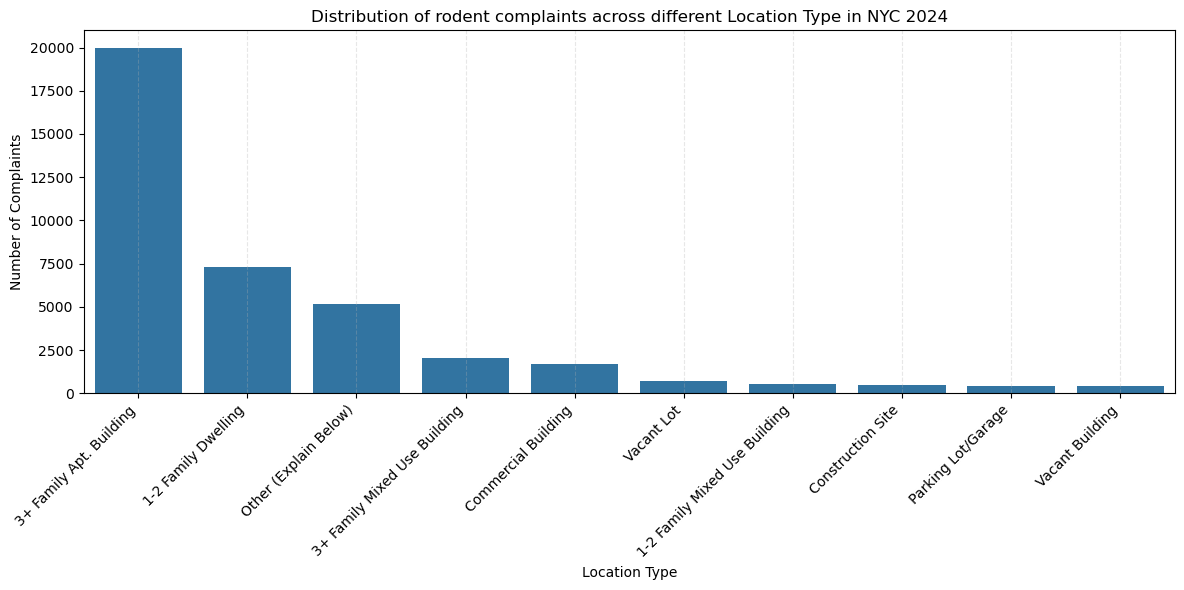

In [30]:
#main part 

df_closed = filter_out_closed_complaints(df)

location_counts = aggregate_by_location_type(df_closed)

for location, count in location_counts.items():
    percentage = (count / len(df_closed)) * 100

    # Prints the results , the < and > are for alignment left vs right
    print(f"{location:<40} {count:>6,} ({percentage:>5.1f}%)")

fig = create_location_type_barplot(location_counts, x_data='Location Type', output_path='../task2_plot.png')

Of closed reports, What are the top 10 building types that have the highest frequency of rodent complaints in NYC over varying months in 2024


/tmp/ipykernel_3131/661832335.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Created Date"] = pandas.to_datetime(df["Created Date"])


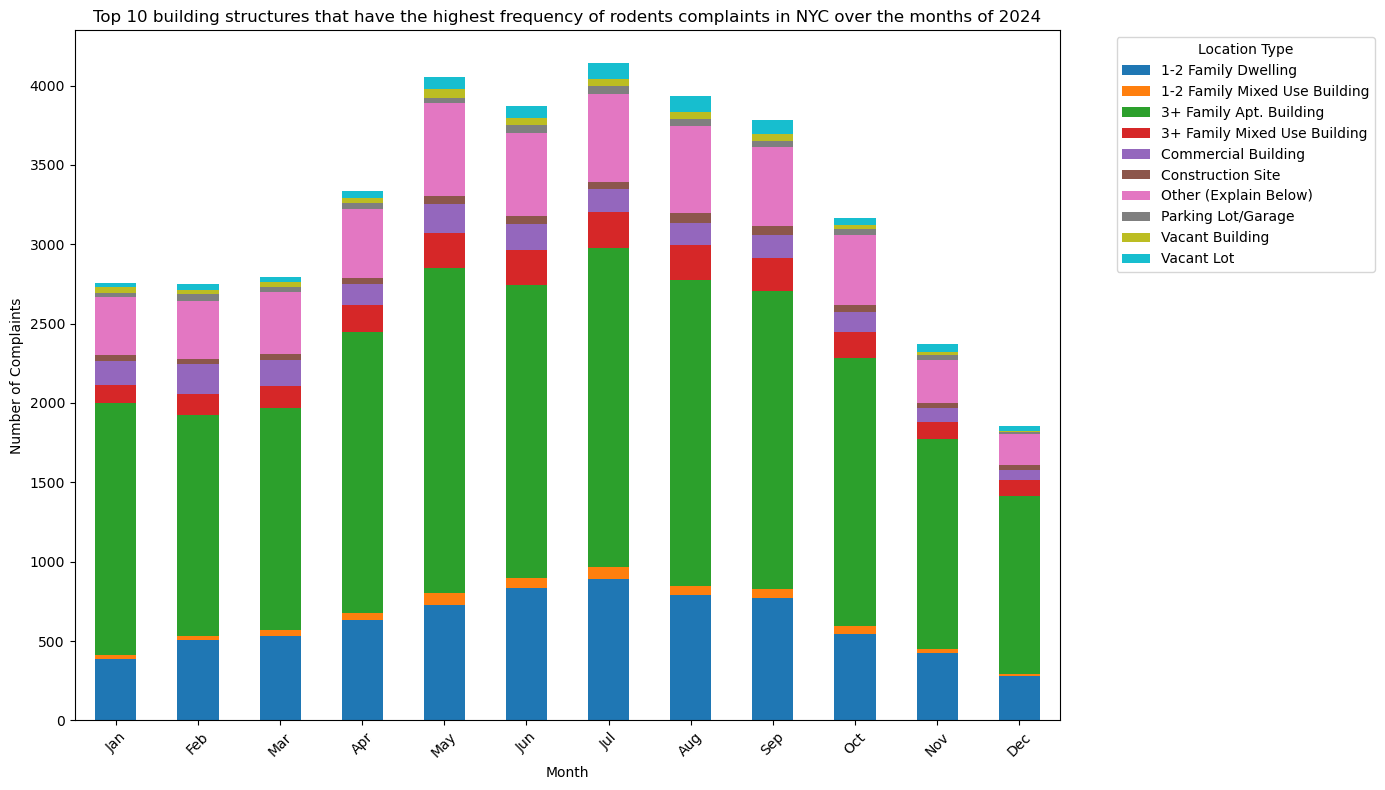

In [32]:
def analyze_monthly_complaints(df,x_data, title ,top_n=10, output_path=None):
    #get the date 
    df["Created Date"] = pandas.to_datetime(df["Created Date"])
    df["Month"] = df["Created Date"].dt.month

    #seelect the top 10 
    top_categories = df[x_data].value_counts().head(top_n).index
    df_filtered = df[df[x_data].isin(top_categories)]

     # Group by month and location type
    monthly_complaints = df_filtered.groupby(['Month', x_data]).size().unstack(fill_value=0)
    #
    # Create stacked bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    monthly_complaints.plot(kind='bar', stacked=True, ax=ax)
    plt.title("Top 10 building structures that have the highest frequency of rodents complaints in NYC over the months of 2024")
    plt.xlabel("Month")
    plt.ylabel("Number of Complaints")
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.legend(title=x_data, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
    
    plt.show()

    return monthly_complaints


monthly_data = analyze_monthly_complaints(df_closed,
                                          x_data='Location Type',
                                          title="Monthly Rodent Complaints by Location Type in NYC (2024)",
                                          top_n=10,
                                          output_path="../monthly_rodent_complaints.png")
